In [17]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Выполнял вычисления на платформе BlueGene поэтому графики по OpenMP ограничиваются только 4 нитями.
В коде пытался реализовать критическую секцию для eps без использования if, это оказалось бессмысленным, потому что подвешивало все нити и программа выполнялась медленнее, чем без использования параллельных вычислений.
Представлены результаты для 1,2,4 нитей и N = 64, 128, 256
Можем заметить, что прослеживается зависимость, а именно: увеличение размера в два раза, дает увеличение времени работы в 8 раз (вполне логичный и ожидаемый вывод)
Использовал измененный метод переменных направлений. Измененный в том смысле, что если не распараллеливал внутренний цикл, а переставлял внешний на один уровень вложенности. Это уменьшило на 1 секунду выполнение с параметрами (2, 128). 

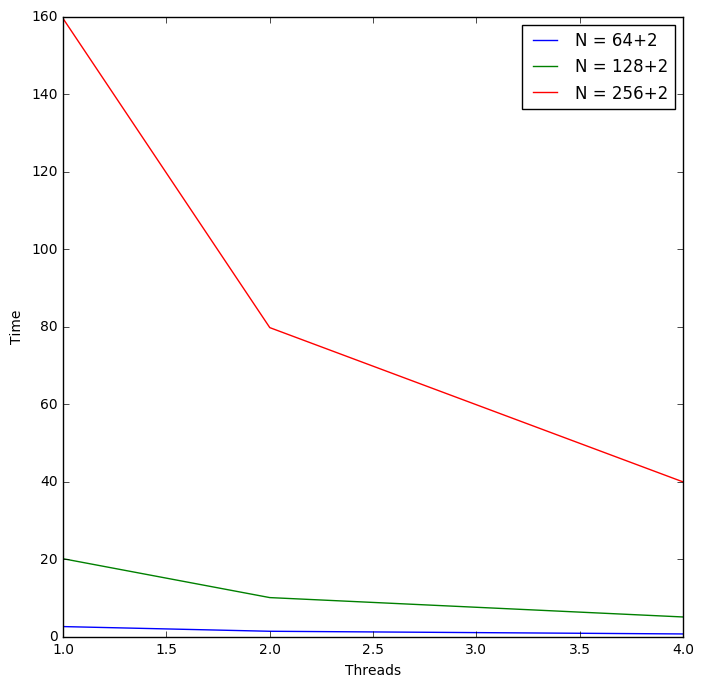

In [18]:
fig = plt.figure(figsize = (8,8))

x = [1, 2, 4]
y = [2.56, 1.35, 0.66]

plt.plot(x, y, label='N = 64+2')

x2 = [1, 2, 4]
y2 = [20.07, 10.04, 5.04]
plt.plot(x2, y2, label='N = 128+2')

x3 = [1, 2, 4]
y3 = [159.45, 79.71, 39.89]
plt.plot(x3, y3, label='N = 256+2')


plt.xlabel('Threads')
plt.ylabel('Time')

plt.legend()

plt.show()

Для MPI результаты получились более показательными. Количество вычислительных кластеров варьировалось от 1 до 64. N брал в тех же пределах. Использовал алгоритм описанный в лекции, т.е. разбивал исходную матрицу на число частей, совпадающее с количество процессоров.
К сожалению, не получилось реализовать совместное использование eps, потому что до того, как я нашел ошибку, я успел занять вычислительные узлы на час. Именно поэтому я и немного опаздываю со сдачей задания.

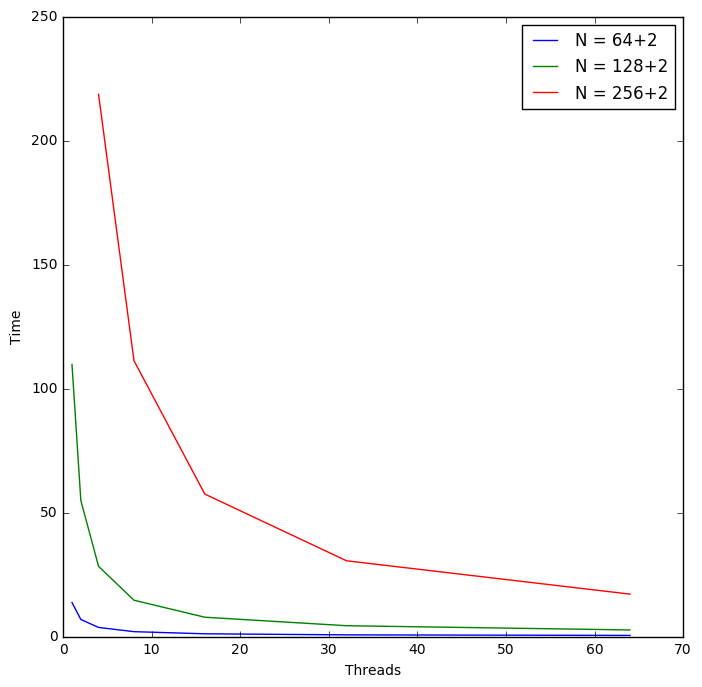

In [15]:
fig = plt.figure(figsize = (8,8))

x = [1, 2, 4, 8, 16, 32, 64]
y = [13.72, 6.87, 3.65, 1.95, 1.09, 0.66, 0.44]

plt.plot(x, y, label='N = 64+2')

x2 = [1, 2, 4, 8, 16, 32, 64]
y2 = [109.7, 54.85, 28.29, 14.63, 7.77, 4.35, 2.64]
plt.plot(x2, y2, label='N = 128+2')

x3 = [4, 8, 16, 32, 64]
y3 = [218.61, 111.2, 57.42, 30.53, 17.09]
plt.plot(x3, y3, label='N = 256+2')


plt.xlabel('Threads')
plt.ylabel('Time')

plt.legend()

plt.show()

Можно сделать несколько выводов: мой алгоритм OMP обгоняет MPI на небольших значениях нитей и процессоров приблизительно в 5-6 раз. У OMP действительно есть преимущество на маленьких количествах вычислительных ресурсов, но именно такой выигрыш скорее всего связан со спецификой именно моей программы. Надо что-то исправить.
Второй вывод - при количестве 64 для небольшого количества данных и 256 для больших, прирост в скорости значительно падает. И о линейном изменении уже говорить не приходится. По моему мнению основными причинами этого являются накладные расходы на создание и взаимодействие, а также работа с критическими секциями.

Это был очень интресный для меня опыт, спасибо за такую возможность!